# (1) Data Description

`players.csv` is a list of all unique players, including data about each player.

`experience`: player's experience level

`subscirbe`: whether the player subscribed to the newsletter.

`hashedEmail`: unique identifier linking to `session.csv`.

`played_hours`: total hour played.

`name`: player's name.

`gender`: player's gender.

`Age`: player's age.

This dataset gives demographic and profile-level data.

Potential issues: Some players have 0 hour played hours.

`session.csv` is a list of individual play sessions by each player, including data about the session.

`hashedEmail`: Unique identifier linking to `players.csv`.

`start_time`: session start time.

`end_time`: session end time.

`original_start_time`: Unix timestamp of start time.

`original_end_time`: Unix timestamp of end time.

This dataset tracks session-level data.

Potential issues: `start_time` and `end_time` are currently stored as `chr`.

# (2) Questions

The broad question our group chose: Question 2

The specific question: Can player's age predict the total play time.

The goal of this analysis is to understand how player characteristics influence their played hour. Here, total play time serves as a proxy for the amount of data contributed by each player. This is an appropriate response variable because players who spend more time on the server produce more in-game logs, interactions, and behavioral data—making them more valuable for the research project.

The explanatory variables are:
1. `Age`: represent player maturity and available time to play. Older players may play less due to commitments, while younger players may play more.

# (3) Exploratory Data Analysis and Visualization

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


**3.1 Load data**

Demonstrate that the dataset can be loaded into R.

In [59]:
players <- read_csv("players.csv")
head(players, 6)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


**3.2 Wrangle the data into a tidy format**

Do the minimum necessary wrangling to turn the data into a tidy format. 

In [71]:
age_hrs <- players |>
    select(experience, Age, played_hours) |>
    group_by(experience, Age) |>
    summarize(played_hours = sum(played_hours), 
              count = n())
age_hrs

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,Age,played_hours,count
<chr>,<dbl>,<dbl>,<int>
Amateur,11,2.9,1
Amateur,14,17.2,1
Amateur,16,150.0,2
Amateur,17,107.5,24
Amateur,18,0.9,1
Amateur,19,0.1,2
Amateur,20,0.0,2
Amateur,21,5.4,7
Amateur,22,33.0,5


**3.3 Mean value of quantitative variables**

Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.

In [37]:
players_mean <- players |>
    summarize(across(where(is.numeric), mean, na.rm = TRUE))

players_mean

Warning message:
“There was 1 warning in `summarize()`.
ℹ In argument: `across(where(is.numeric), mean, na.rm = TRUE)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


**3.4 Visualization**

Make a few exploratory visualizations of the data to help understand it.
- Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
- Explain any insights gain from these plots that are relevant to address the question

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


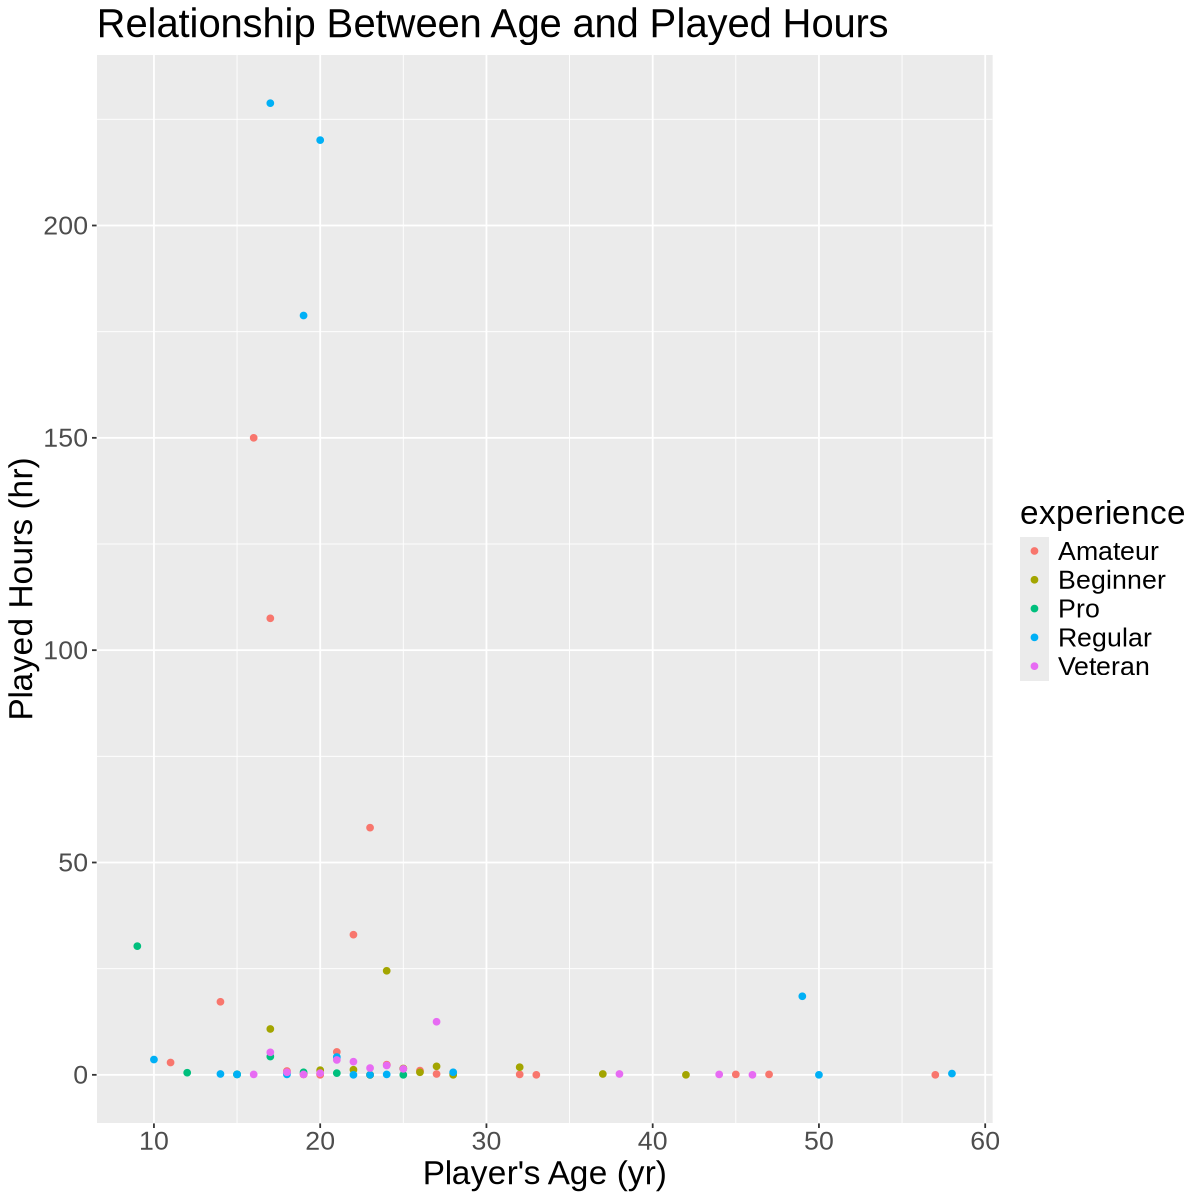

In [73]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(age_hrs, aes(x = Age, y = played_hours, color = experience)) +
    geom_point() +
    labs(title = "Relationship Between Age and Played Hours", 
         x = "Player's Age (yr)", 
         y = "Played Hours (hr)") +
    theme(text = element_text(size = 20))

This scatterplot helps determine whether age is associated with play time. Overall, there is a negative relationship between age and played hours. Younger player tends to spend more time playing, while older players tend to play less. 
- Players below age 20 have the highest variability in played hours. Some young players play extremely long hours.
- Players above age 30 show very limited playtime, mostly near 0.

# (4) Methods and Plan

To answer the question "Can player's age predict the total play time," I will use a simple linear regression model. This will help determine whether there is a statistically significant linear relationship between a player's age and there total played hours.

The model equation is:

$played\_hours\: = β_0 + β_1 * Age$

where:
- $β_0$ is the intercept (predicted played hours when age = 0)
- $β_1$ is the slope coefficent (change in played hours for every 1 year increase in age)

**Why is this method appropriate?**

Simple linear regression is suitable because `played_hours` is continuous and numeric. There is a linear relationship between age and played hours. This model allows us to quantify and visualize how age influences played hours.

**Which assumptions are required, if any, to apply the method selected?**

1. Linearity: The relationship between age and played hours is linear.
2. Independence: Observation are independent of each other.

**What are the potential limitations or weaknesses of the method selected?**

1. The relationship may not be perfectly linear.
2. The data may contain outliers.
3. The dataset has a limited sample size.

**How are you going to compare and select the model?**

1. R-squared to measure how much of the variation in `played_hours` is explained by `Age`.
2. RMSE to quantify prediction accuracy.

**How are you going to process the data to apply the model?**

1. Data cleaning: confirm that both variables are numeric.
2. Data splitting: split the dataset into training (70%) and testing (30%) subset to evaluate the model on unseen data.
3. Model validation: fit the linear regression on the training data. Use the testing data to compute RMSE and R-square for model performance.
4. Cross-validation: Use 5-fold cross-validation on the traning data for more robust performation estimation.